## Letter Model: LDA

## Resources

In [1]:
import pickle
import gensim.corpora as corpora
import gensim
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim

In [2]:
import logging
logging.basicConfig(filename='gensim.log',
                    format="%(asctime)s:%(levelname)s:%(message)s",
                    level=logging.INFO)

In [3]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize = 700,
                                           passes=20,
                                           iterations=400,
                                           alpha='auto',
                                           eta='auto',
                                           eval_every = None,
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

## Get Data

In [4]:
# Get it back
with open("20240608_PhD_LtrLem-N.txt", "rb") as fp:   # Unpickling
    data_lemmatizedNouns = pickle.load(fp)

In [5]:
len(data_lemmatizedNouns[675])

105

In [6]:
# Get it back
with open("20240608_PhD_LtrLem-NV.txt", "rb") as fp:   # Unpickling
    data_lemmatized = pickle.load(fp)

In [7]:
len(data_lemmatized[675])

147

## LDA Model (Nouns Only)

In [8]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatizedNouns)

# Create Corpus
texts = data_lemmatizedNouns

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [9]:
# View
#print(corpus[:1])

In [10]:
# To see word associated with id, use this code.
print(id2word)

Dictionary(6505 unique tokens: ['air', 'apron', 'bye', 'ceremony', 'cermony']...)


In [11]:
# This is the whole human readable list with frequencies
#[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

In [12]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatizedNouns, 
                                                        start=5, 
                                                        limit=30, 
                                                        step=1)

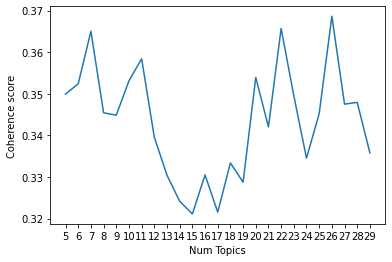

In [13]:
# Show graph
start = 5
limit = 30
step = 1
x = range(start, limit, step)
plt.xticks(range(min(x), max(x)+1))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.savefig('2024xxxx_PhD_TopicLetter-GenLDA.png', dpi=100)
plt.show()

In [14]:
# Print the coherence 
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, 'Coherence: ', round(cv, 4))

Num Topics = 5 Coherence:  0.3499
Num Topics = 6 Coherence:  0.3524
Num Topics = 7 Coherence:  0.365
Num Topics = 8 Coherence:  0.3454
Num Topics = 9 Coherence:  0.3449
Num Topics = 10 Coherence:  0.3531
Num Topics = 11 Coherence:  0.3584
Num Topics = 12 Coherence:  0.3396
Num Topics = 13 Coherence:  0.3304
Num Topics = 14 Coherence:  0.3242
Num Topics = 15 Coherence:  0.3211
Num Topics = 16 Coherence:  0.3305
Num Topics = 17 Coherence:  0.3216
Num Topics = 18 Coherence:  0.3334
Num Topics = 19 Coherence:  0.3288
Num Topics = 20 Coherence:  0.3539
Num Topics = 21 Coherence:  0.342
Num Topics = 22 Coherence:  0.3657
Num Topics = 23 Coherence:  0.3495
Num Topics = 24 Coherence:  0.3345
Num Topics = 25 Coherence:  0.3452
Num Topics = 26 Coherence:  0.3686
Num Topics = 27 Coherence:  0.3475
Num Topics = 28 Coherence:  0.3479
Num Topics = 29 Coherence:  0.3358


In [17]:
print("Coherence score for 26-topic model", coherence_values[21], "\n")

# View the topics
GensimLDA_26 = model_list[21]
pprint(sorted(GensimLDA_26.print_topics(num_words=20)))

Coherence score for 26-topic model 0.36863722160556384 

[(1,
  '0.016*"pound" + 0.013*"wood" + 0.011*"land" + 0.011*"acre" + '
  '0.010*"country" + 0.009*"money" + 0.008*"place" + 0.008*"dollar" + '
  '0.008*"farm" + 0.007*"house" + 0.007*"people" + 0.007*"mill" + '
  '0.006*"neighbourhood" + 0.006*"year" + 0.006*"son" + 0.006*"work" + '
  '0.006*"book" + 0.006*"copy" + 0.005*"day" + 0.005*"government"'),
 (3,
  '0.018*"letter" + 0.018*"day" + 0.014*"child" + 0.013*"week" + 0.013*"time" '
  '+ 0.012*"home" + 0.009*"hour" + 0.009*"brother" + 0.007*"month" + '
  '0.007*"school" + 0.007*"opportunity" + 0.007*"book" + 0.007*"family" + '
  '0.006*"place" + 0.006*"heart" + 0.005*"return" + 0.005*"death" + '
  '0.005*"yesterday" + 0.005*"boy" + 0.005*"country"'),
 (4,
  '0.011*"business" + 0.010*"work" + 0.010*"home" + 0.010*"cundall" + '
  '0.009*"flower" + 0.009*"tree" + 0.008*"office" + 0.007*"horse" + '
  '0.006*"life" + 0.006*"time" + 0.006*"artist" + 0.006*"publication" + '
  '0.006*"p

In [18]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis26 = pyLDAvis.gensim.prepare(GensimLDA_26, corpus, id2word, sort_topics=False)
vis26

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.080871 -0.011770       1        1   2.853657
1      0.095081  0.059037       2        1   1.659785
2     -0.027076  0.033298       3        1   3.695707
3     -0.043028 -0.061435       4        1   1.738521
4      0.129045 -0.087392       5        1   0.646850
5      0.103674 -0.020668       6        1   1.440598
6     -0.095523  0.032393       7        1   2.964298
7     -0.119028  0.019877       8        1   9.657876
8      0.043606 -0.126742       9        1   0.803810
9      0.051554 -0.064031      10        1   0.691387
10     0.103015 -0.075159      11        1   0.995413
11    -0.041413 -0.048606      12        1   1.805792
12     0.166081  0.102138      13        1   2.105384
13    -0.029322  0.066037      14        1  13.778123
14    -0.128975  0.002981      15        1   8.878995
15     0.078796 -0.117946      16        1   1.191532
16    -0.040061  0.032133      17        1   3.536514
17    -0.097434  0.021704      18        1   3.821033
18    -0.037162 -0.048047      19        1   1.896348
19    -0.122441  0.073295      20        1  12.609931
20     0.041308 -0.091158      21        1   1.554834
21     0.091801  0.217261      22        1   9.858090
22    -0.003243 -0.032491      23        1   1.312742
23    -0.043421  0.034858      24        1   3.323233
24     0.089345  0.133751      25        1   4.740755
25    -0.084307 -0.043318      26        1   2.438792, topic_info=       Term         Freq        Total Category  logprob  loglift
11   letter  1071.000000  1071.000000  Default  30.0000  30.0000
22   sister   333.000000   333.000000  Default  29.0000  29.0000
8       day   974.000000   974.000000  Default  28.0000  28.0000
559   pound   307.000000   307.000000  Default  27.0000  27.0000
57     time  1070.000000  1070.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
8       day     9.521815   974.835348  Topic26  -5.0816  -0.9150
87   health     7.628251   313.541916  Topic26  -5.3033  -0.0024
448  family     7.445313   370.504052  Topic26  -5.3276  -0.1936
41     home     6.834637   483.615519  Topic26  -5.4132  -0.5456
97   mother     6.325186   359.350599  Topic26  -5.4906  -0.3261

[2074 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
5049     17  0.844755     abcess
6340      2  0.616288   aberdeen
1014     13  0.040563  abundance
1014     14  0.202815  abundance
1014     20  0.040563  abundance
...     ...       ...        ...
1125     25  0.227187        you
5553     18  0.484402       youe
5553     20  0.363302       youe
5553     25  0.121101       youe
2246      1  0.781032      youse

[6637 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

## LDA Model (Nouns and Verbs)

In [19]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [20]:
# View
#print(corpus[:1])

In [21]:
# To see word associated with id, use this code.
print(id2word)

Dictionary(7834 unique tokens: ['air', 'apron', 'bloom', 'bye', 'ceremony']...)


In [22]:
# This is the whole human readable list with frequencies
#[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

In [23]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        start=5, 
                                                        limit=30, 
                                                        step=1)

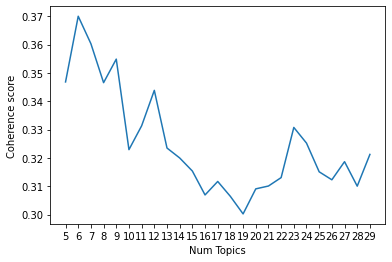

In [24]:
# Show graph
start = 5
limit = 30
step = 1
x = range(start, limit, step)
plt.xticks(range(min(x), max(x)+1))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.savefig('2024xxxx_PhD_TopicLetter-GenLDA.png', dpi=100)
plt.show()

The convergence scores for the noun-verb set are higher so let's dig into those.

In [25]:
# Print the coherence 
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, 'Coherence: ', round(cv, 4))

Num Topics = 5 Coherence:  0.3468
Num Topics = 6 Coherence:  0.37
Num Topics = 7 Coherence:  0.3603
Num Topics = 8 Coherence:  0.3465
Num Topics = 9 Coherence:  0.3548
Num Topics = 10 Coherence:  0.3229
Num Topics = 11 Coherence:  0.3313
Num Topics = 12 Coherence:  0.3438
Num Topics = 13 Coherence:  0.3235
Num Topics = 14 Coherence:  0.32
Num Topics = 15 Coherence:  0.3154
Num Topics = 16 Coherence:  0.3069
Num Topics = 17 Coherence:  0.3117
Num Topics = 18 Coherence:  0.3064
Num Topics = 19 Coherence:  0.3002
Num Topics = 20 Coherence:  0.3091
Num Topics = 21 Coherence:  0.3101
Num Topics = 22 Coherence:  0.313
Num Topics = 23 Coherence:  0.3307
Num Topics = 24 Coherence:  0.3252
Num Topics = 25 Coherence:  0.3151
Num Topics = 26 Coherence:  0.3123
Num Topics = 27 Coherence:  0.3187
Num Topics = 28 Coherence:  0.31
Num Topics = 29 Coherence:  0.3212


In [26]:
print("Coherence score for 6-topic model", coherence_values[1], "\n")

# View the topics
GensimLDA_06 = model_list[1]
pprint(sorted(GensimLDA_06.print_topics(num_words=20)))

Coherence score for 6-topic model 0.3699719138780477 

[(0,
  '0.011*"day" + 0.009*"take" + 0.007*"time" + 0.007*"country" + 0.006*"place" '
  '+ 0.006*"come" + 0.006*"see" + 0.006*"work" + 0.006*"hear" + 0.005*"give" + '
  '0.005*"morning" + 0.005*"fall" + 0.005*"keep" + 0.005*"suppose" + '
  '0.004*"house" + 0.004*"find" + 0.004*"go" + 0.004*"town" + 0.004*"home" + '
  '0.004*"return"'),
 (1,
  '0.022*"country" + 0.021*"land" + 0.014*"pound" + 0.014*"acre" + '
  '0.013*"year" + 0.011*"farm" + 0.010*"dollar" + 0.008*"work" + 0.007*"money" '
  '+ 0.007*"pay" + 0.007*"place" + 0.006*"come" + 0.006*"wheat" + 0.006*"day" '
  '+ 0.006*"see" + 0.006*"price" + 0.005*"take" + 0.005*"sell" + 0.005*"bring" '
  '+ 0.005*"bushel"'),
 (2,
  '0.009*"people" + 0.009*"country" + 0.008*"man" + 0.008*"year" + 0.006*"day" '
  '+ 0.006*"time" + 0.005*"take" + 0.005*"come" + 0.004*"horse" + '
  '0.004*"government" + 0.004*"house" + 0.004*"call" + 0.004*"ride" + '
  '0.003*"town" + 0.003*"fear" + 0.003*"ke

In [28]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis06 = pyLDAvis.gensim.prepare(GensimLDA_06, corpus, id2word, sort_topics=False)
vis06

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.057168  0.041735       1        1   7.526402
1      0.137430 -0.121783       2        1  14.846897
2     -0.040289  0.052945       3        1   3.058020
3      0.127498  0.087509       4        1  71.943889
4     -0.101634 -0.070753       5        1   2.275043
5     -0.180173  0.010348       6        1   0.349748, topic_info=         Term         Freq        Total Category  logprob  loglift
164   country   680.000000   680.000000  Default  30.0000  30.0000
82       take   849.000000   849.000000  Default  29.0000  29.0000
180      land   425.000000   425.000000  Default  28.0000  28.0000
87       year   689.000000   689.000000  Default  27.0000  27.0000
9         day  1010.000000  1010.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1622     cure     0.519142    47.105826   Topic6  -6.4672   1.1477
557       buy     0.583126   163.268830   Topic6  -6.3510   0.0210
286     child     0.577072   521.449172   Topic6  -6.3614  -1.1507
2564     pair     0.456534    32.331284   Topic6  -6.5957   1.3956
579      head     0.429353   128.125580   Topic6  -6.6571  -0.0428

[487 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1340      1  0.126123  abundance
1340      2  0.798779  abundance
1340      4  0.042041  abundance
39        1  0.065149    account
39        2  0.100229    account
...     ...       ...        ...
87        1  0.034825       year
87        2  0.262638       year
87        3  0.031923       year
87        4  0.658773       year
87        5  0.010157       year

[964 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6])

In [149]:
#GensimLDA_15.save("20240609_PhD_TopicLtrLDA15")
#pyLDAvis.save_html(vis15, '20240609_PhD_TopicLtrLDA15.html')